In [97]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [98]:
# 2. Import the dataset (same directory - py)
df = pd.read_csv('cancer.csv')

In [99]:
# 3. Exploratory data analysis: Data Information
print(df.head())
print(df.shape)
print(df.info())

        Id  Clump_thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
0  1000025                5                     1                      1   
1  1002945                5                     4                      4   
2  1015425                3                     1                      1   
3  1016277                6                     8                      8   
4  1017023                4                     1                      1   

   Marginal_Adhesion  Single_Epithelial_Cell_Size Bare_Nuclei  \
0                  1                            2           1   
1                  5                            7          10   
2                  1                            2           2   
3                  1                            3           4   
4                  3                            2           1   

   Bland_Chromatin  Normal_Nucleoli  Mitoses  Class  
0                3                1        1      2  
1                3                2        1

In [100]:
# 2-1. object delete 
df = df.drop(columns=['Bare_Nuclei'])
# 3. Exploratory data analysis: Class Inbalance
print(df['Class'].value_counts())
print()
print(df['Mitoses'].value_counts())
print()
print(df['Bland_Chromatin'].value_counts())
print()
print(df['Class'].value_counts()/np.float64(len(df)))

Class
2    458
4    241
Name: count, dtype: int64

Mitoses
1     579
2      35
3      33
10     14
4      12
7       9
8       8
5       6
6       3
Name: count, dtype: int64

Class
2    0.655222
4    0.344778
Name: count, dtype: float64


In [101]:
# 3. Exploratory data analysis: Check Missing Data
print(df.isnull().sum())

Id                             0
Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


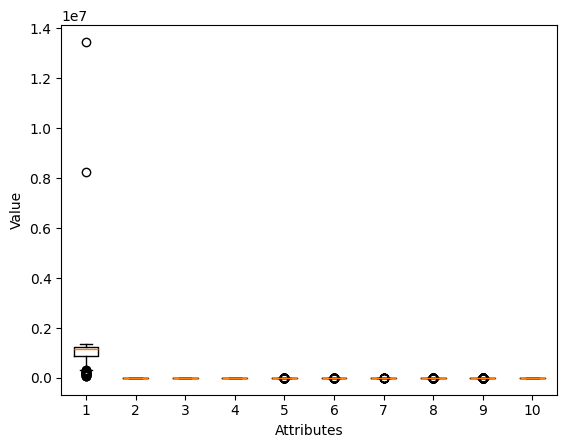

In [102]:
# 3. Exploratory data analysis: Check Outliers
plt.boxplot(df)
plt.xlabel('Attributes')
plt.ylabel('Value')
plt.show()

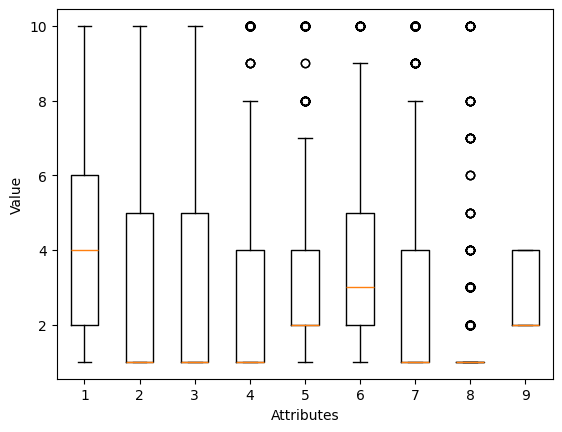

In [103]:
# 3-1. Exploratory data analysis: Outliers Detail
data_to_boxplot = df.drop(columns=['Id'])
plt.boxplot(data_to_boxplot)
plt.xlabel('Attributes')
plt.ylabel('Value')
plt.show()
df = df.drop(columns=['Id'])

In [104]:
# 4. Split data into separate training and test set 7:3
training_points = df.drop(columns=['Class'])
training_labels = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
	training_points, 
	training_labels, 
	test_size=0.3, 
	random_state=4)

print(X_train)
print(y_train)
print(X_test)
print(y_test)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

     Clump_thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
15                 7                     4                      6   
665                1                     1                      1   
348                3                     4                      4   
429                2                     1                      1   
282                1                     4                      3   
..               ...                   ...                    ...   
599                5                     2                      4   
360                6                    10                     10   
439                5                     1                      1   
174                8                     6                      5   
122               10                    10                     10   

     Marginal_Adhesion  Single_Epithelial_Cell_Size  Bland_Chromatin  \
15                   4                            6                4   
665                  1     

In [105]:
# 5. Fit K Neighbours Classifier to the training set 5
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

print(guesses)

[4 2 2 4 2 2 2 4 4 4 2 2 2 2 4 4 2 2 2 2 2 4 2 2 2 2 2 2 4 4 2 4 2 2 2 4 2
 4 4 2 2 4 4 2 2 2 2 2 2 2 2 4 2 2 2 2 4 4 4 4 2 2 4 4 4 2 2 2 4 2 2 4 4 2
 2 2 4 2 2 2 2 2 2 2 2 2 2 4 4 2 2 2 2 4 4 4 2 2 4 2 4 2 2 2 2 2 2 2 2 2 2
 2 2 4 2 4 4 2 2 2 4 2 4 2 2 2 2 4 2 4 2 2 2 4 2 4 2 2 4 4 4 2 2 2 2 4 2 2
 4 2 2 2 2 2 2 2 2 2 2 2 4 2 2 4 2 4 2 4 2 2 2 2 4 2 4 4 4 2 4 2 2 4 2 4 2
 2 2 2 4 4 2 4 2 4 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2]


In [106]:
# 6. Check Accuracy Score
print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[[136   2]
 [  9  63]]
0.9476190476190476


In [107]:
# 7. Rebuild kNN Classification model using different values of k triple
classifier = KNeighborsClassifier(n_neighbors = 15)
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

print(guesses)
print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[4 2 2 4 2 2 2 4 4 4 2 2 2 2 4 4 2 2 2 2 2 4 2 2 2 2 2 2 4 4 2 4 2 2 2 4 2
 4 4 2 2 4 4 2 2 2 2 2 2 2 2 4 2 2 2 2 4 4 4 4 2 2 4 4 4 2 2 2 4 2 2 4 4 2
 2 2 4 2 2 2 2 2 2 2 2 2 2 4 4 2 2 2 2 4 4 4 2 4 4 2 4 2 2 2 2 2 2 2 2 2 2
 2 2 4 2 4 4 2 2 2 4 2 4 2 2 2 2 4 2 4 2 2 2 2 2 4 2 2 4 4 4 2 2 2 2 4 2 2
 4 2 2 2 2 2 2 2 2 2 2 2 4 2 2 4 2 4 2 4 2 2 2 2 4 2 4 4 4 2 4 2 2 4 2 4 2
 2 2 2 4 4 2 4 2 4 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2]
[[136   2]
 [  9  63]]
0.9476190476190476


In [108]:
# 7. Rebuild kNN Classification model using different values of k double
classifier = KNeighborsClassifier(n_neighbors = 30)
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

print(guesses)
print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[4 2 2 4 2 2 2 4 4 4 2 2 2 2 4 4 2 2 2 2 2 4 2 2 2 2 2 2 4 4 2 4 2 2 2 4 2
 4 4 2 2 4 4 2 2 2 2 2 2 2 2 4 2 2 2 2 4 4 4 4 2 2 4 4 4 2 2 2 4 2 2 4 4 2
 2 2 4 2 2 2 2 2 2 2 2 2 2 4 4 2 2 2 2 4 4 4 2 4 4 2 4 2 2 2 2 2 2 2 2 2 2
 2 2 4 2 4 4 2 2 2 4 2 4 2 2 2 2 4 2 4 2 2 2 2 2 4 2 2 4 4 4 2 2 2 2 4 2 2
 4 2 2 2 2 2 2 2 2 2 2 2 4 2 2 4 2 4 2 4 2 2 2 2 4 2 4 4 4 2 4 2 2 4 2 4 2
 2 2 2 4 4 2 4 2 4 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2]
[[136   2]
 [  9  63]]
0.9476190476190476


[0.9333333333333333, 0.9047619047619048, 0.9428571428571428, 0.9285714285714286, 0.9476190476190476, 0.9428571428571428, 0.9476190476190476, 0.9428571428571428, 0.9476190476190476, 0.9428571428571428, 0.9523809523809523, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9476190476190476, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9428571428571428, 0.9476190476190476, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428,

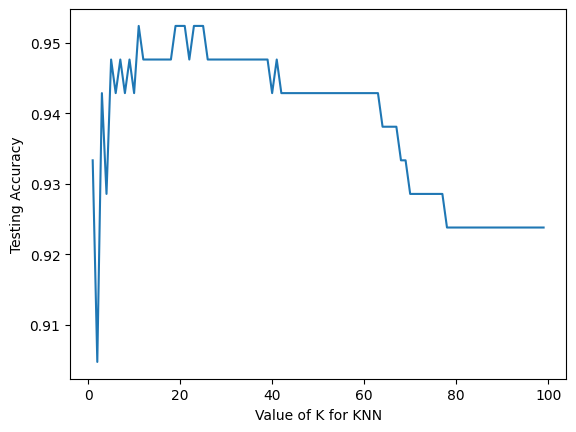

In [109]:
# 7. Improving Accuracy: Tuning k parameter 1 to 100
k_range = range(1, 100)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [110]:
# 8. Improving Accuracy: Changing split ratio 8:2 (prev 7:3)
training_points = df.drop(columns=['Class'])
training_labels = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
	training_points, 
	training_labels, 
	test_size=0.2, 
	random_state=4)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(559, 8)
(559,)
(140, 8)
(140,)


[0.9285714285714286, 0.8928571428571429, 0.9357142857142857, 0.9357142857142857, 0.95, 0.9357142857142857, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9285714285714286, 0.95, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9357142857142857, 0.9357142857142857, 0.9357142857142857, 0.9357142857142857, 0.9357142857142857, 0.9357142857142857, 0.9357142857142857, 0.9357142857142857, 0.9357142857142857, 0.9357142857142857, 0.93571

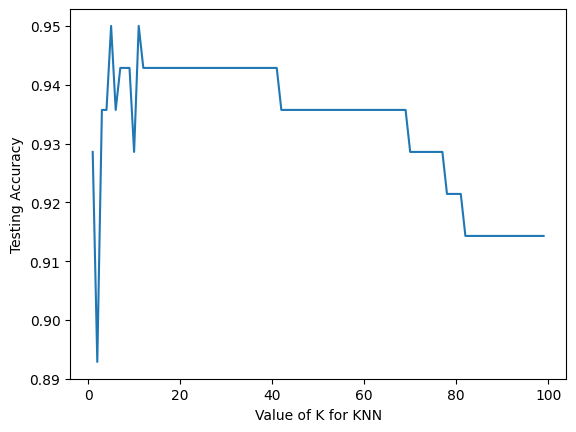

In [111]:
# 8. Improving Accuracy: Changing split ratio (8:2)
# Tuning k parameter 
k_range = range(1, 100)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

<Axes: >

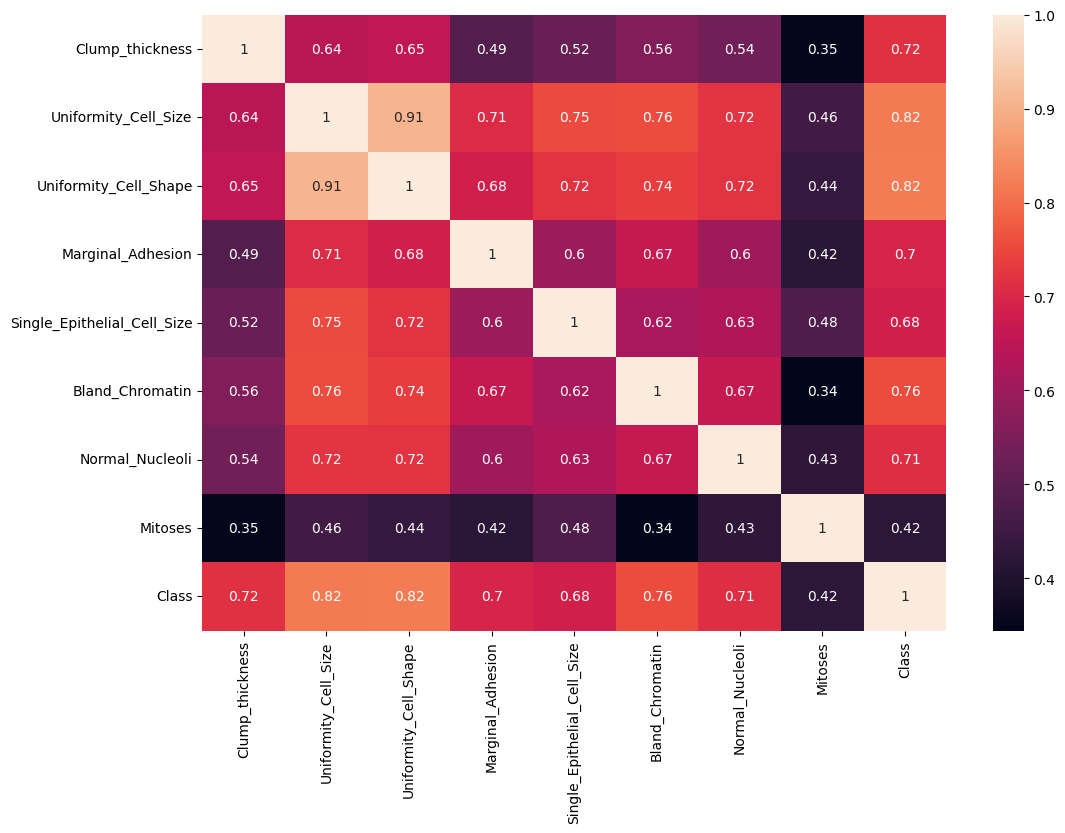

In [112]:
# 9. Improving Accuracy: Feature Engineering
dfcorr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(data = dfcorr, annot=True)

In [113]:
# 10. Improving Accuracy: Feature Engineering ( low 2 columns 0.68, 0.42 )
df = df.drop(columns=['Single_Epithelial_Cell_Size','Mitoses'])

In [114]:
# 11. Split data into separate training and test set
training_points = df.drop(columns=['Class'])
training_labels = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
	training_points, 
	training_labels, 
	test_size=0.3, 
	random_state=4)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(489, 6)
(489,)
(210, 6)
(210,)


[0.9333333333333333, 0.9047619047619048, 0.9571428571428572, 0.9428571428571428, 0.9571428571428572, 0.9476190476190476, 0.9571428571428572, 0.9428571428571428, 0.9523809523809523, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9476190476190476, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9476190476190476,

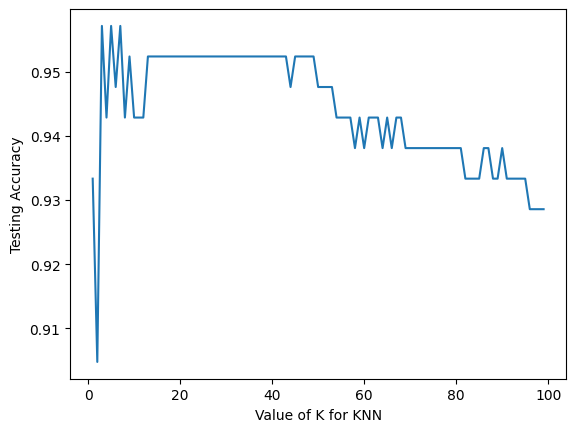

In [115]:
# 11. Tuning k parameter 
k_range = range(1, 100)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [116]:
# 12. Improving Accuracy: Feature Scaling
df.describe()

Clump_thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
count       699.000000            699.000000             699.000000   
mean          4.417740              3.134478               3.207439   
std           2.815741              3.051459               2.971913   
min           1.000000              1.000000               1.000000   
25%           2.000000              1.000000               1.000000   
50%           4.000000              1.000000               1.000000   
75%           6.000000              5.000000               5.000000   
max          10.000000             10.000000              10.000000   

       Marginal_Adhesion  Bland_Chromatin  Normal_Nucleoli       Class  
count         699.000000       699.000000       699.000000  699.000000  
mean            2.806867         3.437768         2.866953    2.689557  
std             2.855379         2.438364         3.053634    0.951273  
min             1.000000         1.000000         1.000000    2.000000  
25%             1.000000         2.000000         1.000000    2.000000  
50%             1.000000         3.000000         1.000000    2.000000  
75%             4.000000         5.000000         4.000000    4.000000  
max            10.000000        10.000000        10.000000    4.000000

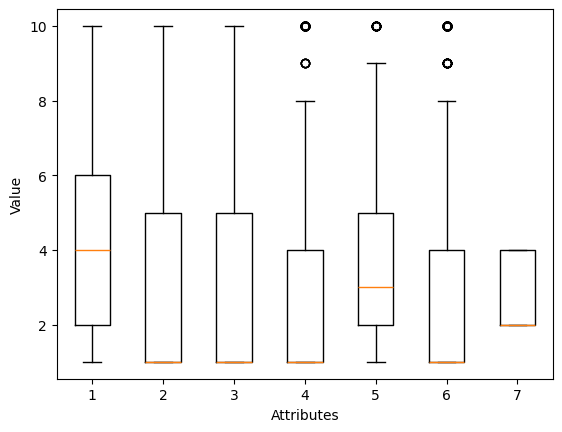

In [117]:
plt.boxplot(df)
plt.xlabel('Attributes')
plt.ylabel('Value')
plt.show()

In [118]:
# 12. Improving Accuracy: Feature Scaling
from sklearn.preprocessing import RobustScaler

#Create copy of dataset.
df = df.copy()

scaler = RobustScaler()


features = [['Marginal_Adhesion', 'Normal_Nucleoli']]
for feature in features:
    df[feature] = scaler.fit_transform(df[feature])



In [119]:
# 13. Split data into separate training and test set
training_points = df.drop(columns=['Class'])
training_labels = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
	training_points, 
	training_labels, 
	test_size=0.3, 
	random_state=4)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(489, 6)
(489,)
(210, 6)
(210,)


In [120]:
# 14. Tuning k parameter 
k_range = range(1, 100)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

[0.9428571428571428, 0.9047619047619048, 0.9714285714285714, 0.9666666666666667, 0.9714285714285714, 0.9619047619047619, 0.9666666666666667, 0.9571428571428572, 0.9619047619047619, 0.9523809523809523, 0.9571428571428572, 0.9523809523809523, 0.9666666666666667, 0.9523809523809523, 0.9571428571428572, 0.9476190476190476, 0.9571428571428572, 0.9476190476190476, 0.9523809523809523, 0.9523809523809523, 0.9571428571428572, 0.9523809523809523, 0.9571428571428572, 0.9523809523809523, 0.9619047619047619, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476,